# Loading data and imports

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Basic EDA

In [ ]:
# Shape and structure
print(f"Shape: {df.shape}")
df.info()

Shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothnes

In [ ]:
# Descriptive statistics
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


/tmp/ipython-input-3869996702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


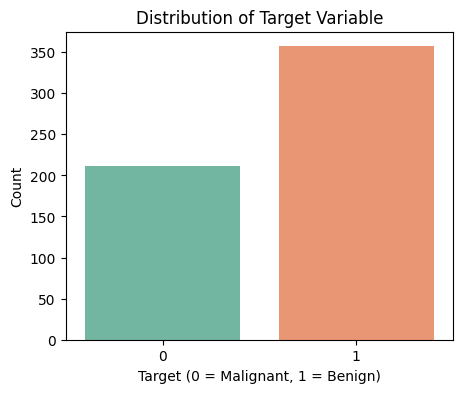

,proportion
target,
1,0.627417
0,0.372583


In [ ]:
# Looking at Target variable distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.show()

df['target'].value_counts(normalize=True)


In [ ]:
corr = df.corr()['target'].sort_values(ascending=False)
corr.head(10), corr.tail(10)

(target                     1.000000
 smoothness error           0.067016
 mean fractal dimension     0.012838
 texture error              0.008303
 symmetry error             0.006522
 fractal dimension error   -0.077972
 concavity error           -0.253730
 compactness error         -0.292999
 worst fractal dimension   -0.323872
 mean symmetry             -0.330499
 Name: target, dtype: float64,
 worst concavity        -0.659610
 mean concavity         -0.696360
 mean area              -0.708984
 mean radius            -0.730029
 worst area             -0.733825
 mean perimeter         -0.742636
 worst radius           -0.776454
 mean concave points    -0.776614
 worst perimeter        -0.782914
 worst concave points   -0.793566
 Name: target, dtype: float64)

# Building a Baseline Model

In [ ]:
X = df.drop("target", axis=1).values
y = df["target"].values

In [ ]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model training

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Prediction and model performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9825

Confusion Matrix:
 [[40  2]
 [ 0 72]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.9692 ± 0.0245
